In [12]:
import pandas as pd
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
import string
from nltk import word_tokenize, ngrams

In [13]:
file_path = 'C:\\Users\\ADMIN\\Desktop\\Webmining Dataset\\train.json'
df_train = pd.read_json(file_path)
test_file_path = 'C:\\Users\\ADMIN\\Desktop\\Webmining Dataset\\test.json'
df_test = pd.read_json(test_file_path)

print("Train:")
df_combined_train = df_train[['comment', 'text_label']].head(5)
display(df_combined_train)

print("Test:")
df_combined_test = df_test[['comment', 'text_label']].head(5)
display(df_combined_test)

Train:


,comment,text_label
0,💯 khách sạn kh có gì để chê 🤣,[]
1,"Khách sạn mới, đẹp và khá là rẻ. Không biết do...","[Location#Positive, Food#Positive, Service#Pos..."
2,"Phòng studio đẹp rộng rãi, đầy đủ tiện nghi, v...","[Location#Positive, Food#Positive, Room#Positi..."
3,"Nơi ở sạch sẽ, tiện nghi, vị trí gần trung tâm...","[Location#Positive, Service#Positive, Public_a..."
4,"Khách sạn view quá sức xinh, nhân viên thân th...","[Food#Positive, Service#Positive, Public_area#..."


Test:


,comment,text_label
0,"trải nghiệm dịch vụ chất lượng cao, tuyệt vời,...","[Location#Positive, Facilities#Positive, Servi..."
1,"Đặt phòng đôi thì đưa phòng đơn, kêu đổi phòng...","[Room#Negative, Service#Negative]"
2,"Nhìn tổng thể thì phòng cũng ok, theo ý kiến c...","[Location#Positive, Room#Neutral, Service#Posi..."
3,"khách sạn nằm trong tổ hợp SunPlaza, rất gần c...","[Location#Positive, Room#Positive, Service#Pos..."
4,"10/10, should book itttt ✧.* Mình đặt phòng và...","[Location#Positive, Room#Positive, Service#Pos..."


In [14]:
# Basic Statistics
print("Train:")
print(f"Total comments: {len(df_train)}")
print(f"Unique labels: {df_train['text_label'].explode().nunique()}")

# Basic Statistics
print("Test:")
print(f"Total comments: {len(df_test)}")
print(f"Unique labels: {df_test['text_label'].explode().nunique()}")

Train:
Total comments: 2876
Unique labels: 18
Test:
Total comments: 1000
Unique labels: 18


In [15]:
df_combined = pd.concat([df_train, df_test], ignore_index=True)

In [16]:
# Check for missing values in the dataset
missing_summary = df_combined.isnull().sum()
missing_percentage = (missing_summary / len(df_combined)) * 100
print("Missing Values Summary:")
print(pd.DataFrame({'Total Missing': missing_summary, 'Percentage (%)': missing_percentage}))


Missing Values Summary:
                    Total Missing  Percentage (%)
comment                         0             0.0
list_img                        0             0.0
text_label                      0             0.0
text_img_label                  0             0.0
label_each_img                  0             0.0
text_one_img_label              0             0.0


Sentiment    Positive  Neutral  Negative
Category                                
Facilities      439.0    155.0     187.0
Food            511.0    179.0     114.0
Location        929.0     73.0      90.0
Public_area     791.0     49.0      61.0
Room           1528.0    386.0     395.0
Service        2307.0    104.0     248.0


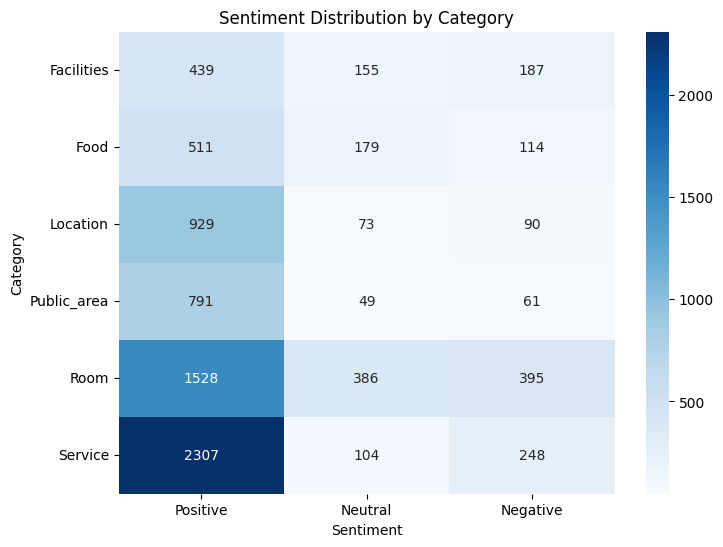

In [17]:
# Create table
label_counts = df_combined['text_label'].explode().value_counts()
label_df = label_counts.reset_index()
label_df.columns = ['Label', 'Count']
label_df[['Category', 'Sentiment']] = label_df['Label'].str.split('#', expand=True)
label_df = label_df.drop(columns=['Label'])
pivot_df = label_df.pivot_table(index='Category', columns='Sentiment', values='Count', fill_value=0)
pivot_df_transposed = pivot_df.T
pivot_df = pivot_df[['Positive', 'Neutral', 'Negative']]
print(pivot_df)

# Create Graph
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='g')
plt.title('Sentiment Distribution by Category')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


Number of comments: 3876
Average length of comments (in words): 188.55
Average word count: 42.36


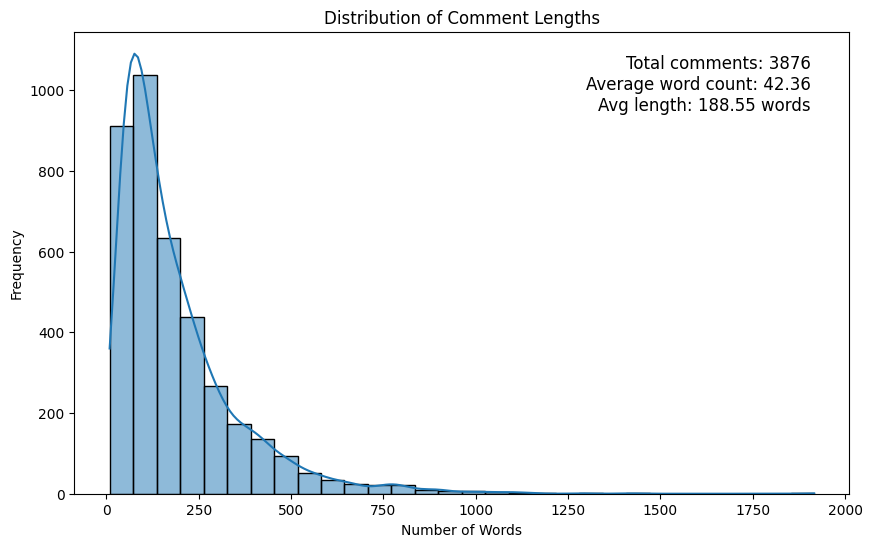

In [18]:
# Calculate statistics
total_comments = len(df_combined)
df_combined['comment_length'] = df_combined['comment'].apply(len)
average_length = df_combined['comment_length'].mean()
average_word_count = df_combined['comment'].apply(lambda x: len(x.split())).mean()

# Display additional statistics
print(f"Number of comments: {total_comments}")
print(f"Average length of comments (in words): {average_length:.2f}")
print(f"Average word count: {average_word_count:.2f}")

# Create Graph
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['comment_length'], bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.text(x=0.95, y=0.95, s=f"Total comments: {total_comments}\n"
                            f"Average word count: {average_word_count:.2f}\n"
                           f"Avg length: {average_length:.2f} words\n",
         fontsize=12, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='right')

plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21464\3554048038.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigram_labels), y=list(counts), palette='viridis')


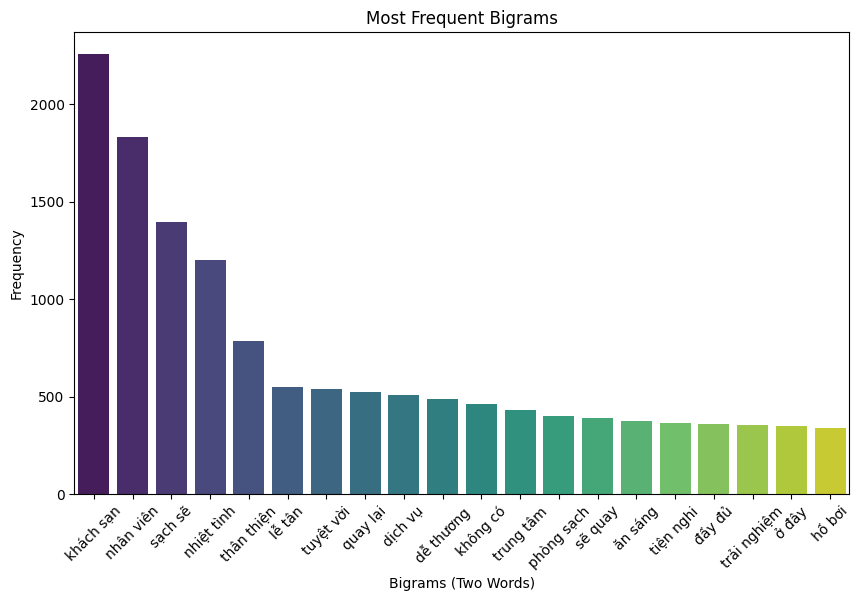

In [19]:
comments = df_combined['comment'].dropna().tolist()  
all_bigrams = []
for comment in comments:
    tokens = word_tokenize(comment.lower())
    tokens = [word for word in tokens if word not in string.punctuation]
    bigrams = list(ngrams(tokens, 2)) 
    all_bigrams.extend(bigrams)
bigram_freq = Counter(all_bigrams)
common_bigrams = bigram_freq.most_common(20)

bigrams, counts = zip(*common_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigrams]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(bigram_labels), y=list(counts), palette='viridis')
plt.title('Most Frequent Bigrams')
plt.xlabel('Bigrams (Two Words)')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

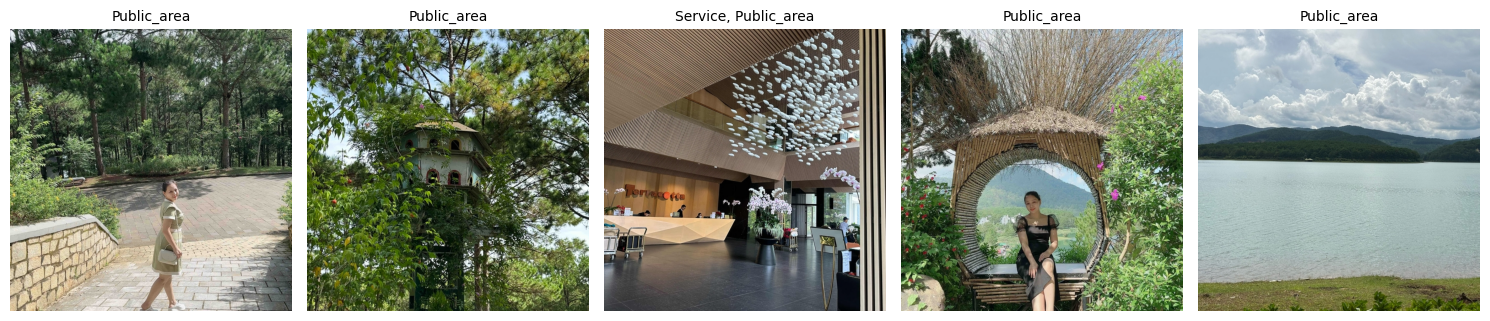

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Path
excel_path = r"C:\Users\ADMIN\Desktop\Webmining Dataset\all_image_label.xlsx"
image_folder = r"C:\Users\ADMIN\Desktop\Webmining Dataset\image"

data = pd.read_excel(excel_path)

def display_images_with_labels(data):
    fig, axes = plt.subplots(1, len(data), figsize=(15, 5))  
    for i, (index, row) in enumerate(data.iterrows()):
        image_path = os.path.join(image_folder, row['file_name'])
        
        if os.path.exists(image_path):
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off') 
        else:
            axes[i].text(0.5, 0.5, "File not esist", ha='center', va='center', fontsize=12)
            axes[i].axis('off')
        
        labels = [col for col in data.columns[1:] if not pd.isnull(row[col])]
        labels_text = ", ".join(labels) if labels else "Not have labels"
        axes[i].set_title(labels_text, fontsize=10)

    plt.tight_layout()
    plt.show()
    
data_subset = data.head(5)
display_images_with_labels(data_subset)


In [29]:
import os
directory_path = image_folder
def count_images(directory):
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'}
    image_count = 0
    for file in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, file)) and os.path.splitext(file)[1].lower() in image_extensions:
            image_count += 1
    
    return image_count

# Count
number_of_images = count_images(directory_path)
print(f"Number of images: {number_of_images}")

Number of images: 18310


Location          0
Food            520
Room           3965
Facilities     1060
Service         110
Public_area    5153
dtype: int64


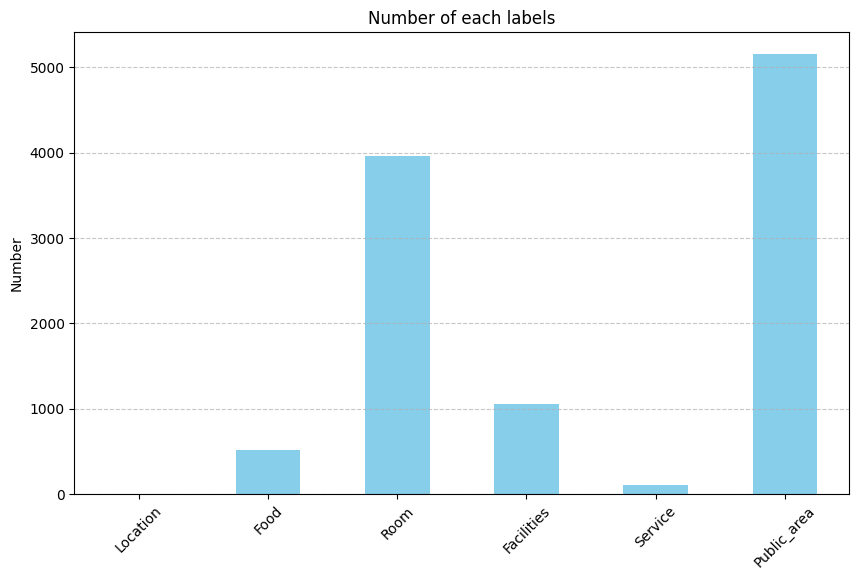

In [34]:
file_path = 'all_image_label.xlsx'  
df = pd.read_excel(file_path, sheet_name='sheet1')

column_counts = df.drop(columns="file_name").count()
print(column_counts)
plt.figure(figsize=(10, 6))
column_counts.plot(kind='bar', color='skyblue')
plt.title('Number of each labels')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()